In [116]:
import pandas as pd
import warnings

In [117]:
warnings.filterwarnings("ignore")

In [118]:
df=pd.read_csv(r"C:\Users\PC\Desktop\Data Explatory\Airbnb_Open_Data.csv")

# Deleting Redundant Columns


In [119]:
cols_to_drop=['number of reviews', 'last review', 'reviews per month',
        'review rate number', 'calculated host listings count',
        'availability 365', 'house_rules', 'license', 'id']

In [120]:
df.drop(columns=cols_to_drop, inplace=True)


In [121]:
df.head()

,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0
2,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,Private room,2005.0,$620,$124,3.0
3,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,Entire home/apt,2005.0,$368,$74,30.0
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0


In [122]:
df.shape

(102599, 17)

# Renaming Columns


In [123]:
df.columns

Index(['NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights'],
      dtype='object')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   NAME                    102349 non-null  object 
 1   host id                 102599 non-null  int64  
 2   host_identity_verified  102310 non-null  object 
 3   host name               102193 non-null  object 
 4   neighbourhood group     102570 non-null  object 
 5   neighbourhood           102583 non-null  object 
 6   lat                     102591 non-null  float64
 7   long                    102591 non-null  float64
 8   country                 102067 non-null  object 
 9   country code            102468 non-null  object 
 10  instant_bookable        102494 non-null  object 
 11  cancellation_policy     102523 non-null  object 
 12  room type               102599 non-null  object 
 13  Construction year       102385 non-null  float64
 14  price               

In [125]:
df.columns=[col.title()for col in df.columns]

In [126]:
df.columns=[col.replace("_"," ").title()for col in df.columns]

In [127]:
df.columns

Index(['Name', 'Host Id', 'Host Identity Verified', 'Host Name',
       'Neighbourhood Group', 'Neighbourhood', 'Lat', 'Long', 'Country',
       'Country Code', 'Instant Bookable', 'Cancellation Policy', 'Room Type',
       'Construction Year', 'Price', 'Service Fee', 'Minimum Nights'],
      dtype='object')



# Dropping Duplicates


In [128]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [129]:
df.drop_duplicates(inplace=True)

In [130]:
df.duplicated().sum()

np.int64(0)

# Removing Missing (NaN) Values


In [131]:
df.isna().sum().sort_values(ascending=False)

Country                   532
Host Name                 404
Minimum Nights            400
Host Identity Verified    289
Service Fee               273
Name                      250
Price                     247
Construction Year         214
Country Code              131
Instant Bookable          105
Cancellation Policy        76
Neighbourhood Group        29
Neighbourhood              16
Lat                         8
Long                        8
Host Id                     0
Room Type                   0
dtype: int64

 MISSING VALUES ANALYSIS 

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


TOTAL PERCENTAGE OF NAN

In [133]:
df.isna().sum().sum()/(df.shape[0]*df.shape[1])*100

np.float64(0.17187458573152753)

NAN PERCENTAGE PER COLUMN

In [134]:
Nan_percntage=df.isna().sum()/df.shape[0]*100 
Info_df=pd.DataFrame({"Missing_Values":df.isna().sum(),"Percentage":Nan_percntage})
Info_df=Info_df.sort_values(by=["Percentage","Missing_Values"],ascending=False)
Info_df["Percentage"]=Info_df["Percentage"].round(2)
print("           MISSING VALUES ANALYSIS")
print("_"*40)
print(Info_df)

           MISSING VALUES ANALYSIS
________________________________________
                        Missing_Values  Percentage
Country                            532        0.52
Host Name                          404        0.40
Minimum Nights                     400        0.39
Host Identity Verified             289        0.28
Service Fee                        273        0.27
Name                               250        0.24
Price                              247        0.24
Construction Year                  214        0.21
Country Code                       131        0.13
Instant Bookable                   105        0.10
Cancellation Policy                 76        0.07
Neighbourhood Group                 29        0.03
Neighbourhood                       16        0.02
Lat                                  8        0.01
Long                                 8        0.01
Host Id                              0        0.00
Room Type                            0        0.00


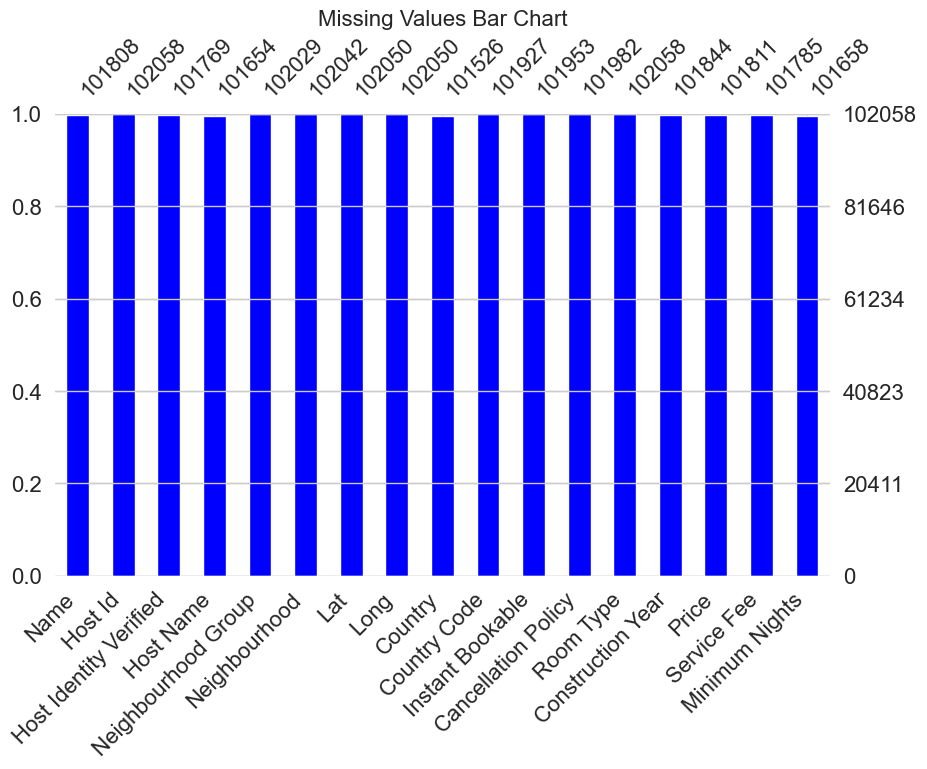

In [135]:
msno.bar(df, color='blue', figsize=(10, 6))
plt.title("Missing Values Bar Chart",fontsize=16)
plt.show()

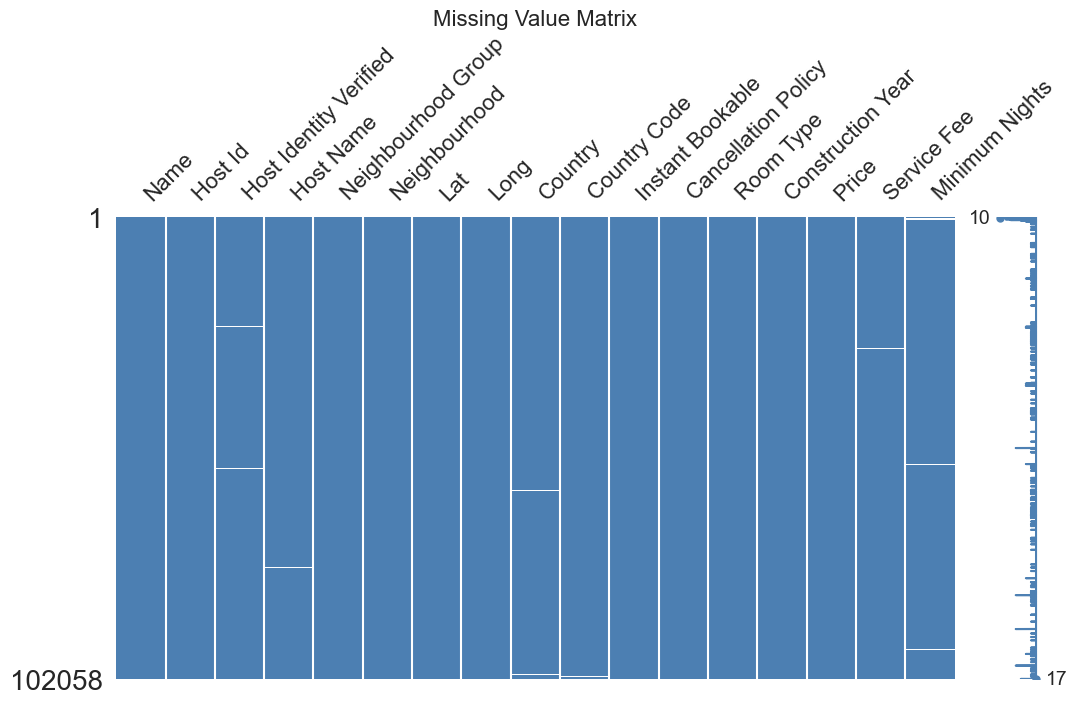

In [136]:
msno.matrix(df, figsize=(12, 6), color=(0.3, 0.5, 0.7))
plt.title('Missing Value Matrix',fontsize=16)
plt.show()

Text(0.5, 1.0, 'Missing Value Heatmap')

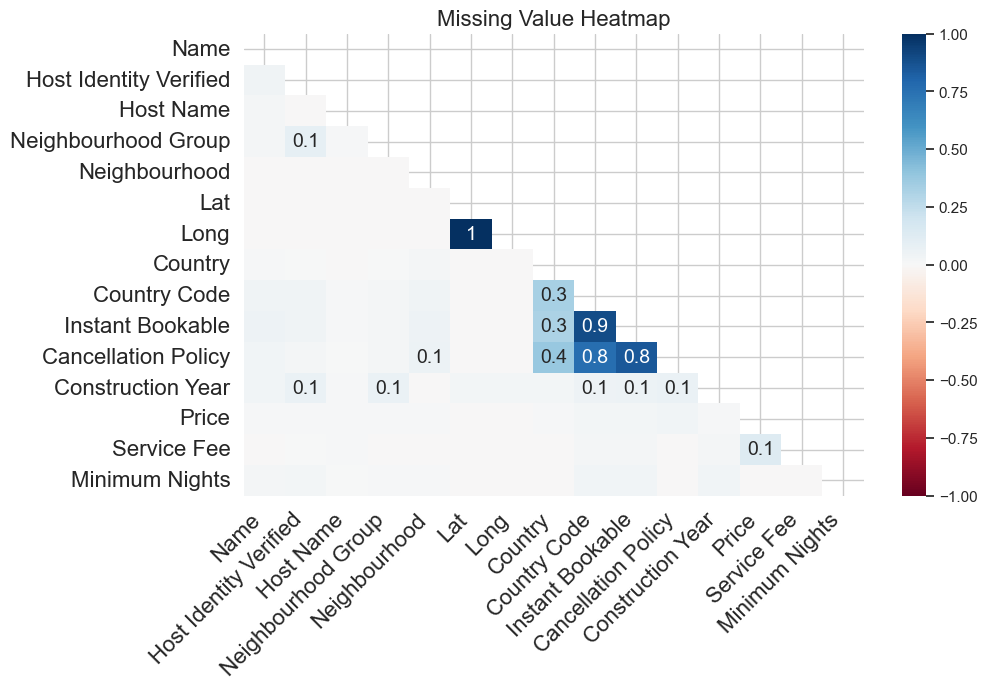

In [137]:

msno.heatmap(df, figsize=(10, 6))
plt.title('Missing Value Heatmap',fontsize=16)

 Fill NaN values in 'NetWorth' column with median
df['NetWorth'].fillna(df['NetWorth'].median(), inplace=True)
 
 Fill NaN values in 'Country' column with mode
df['Country'].fillna(df['Country'].mode()[0], inplace=True)

Drop rows where 'Name' column is NaN
df.dropna(subset=['Name'], inplace=True)


In [138]:
df.dropna(inplace=True)

In [141]:
df.isna().sum().sum()

np.int64(0)

In [139]:
df.head()

,Name,Host Id,Host Identity Verified,Host Name,Neighbourhood Group,Neighbourhood,Lat,Long,Country,Country Code,Instant Bookable,Cancellation Policy,Room Type,Construction Year,Price,Service Fee,Minimum Nights
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0
5,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013.0,$577,$115,3.0
7,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,moderate,Private room,2009.0,"$1,060",$212,45.0


# Cleaning Individual Columns

In [143]:
df.head()

,Name,Host Id,Host Identity Verified,Host Name,Neighbourhood Group,Neighbourhood,Lat,Long,Country,Country Code,Instant Bookable,Cancellation Policy,Room Type,Construction Year,Price,Service Fee,Minimum Nights
0,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0
1,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0
4,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,Entire home/apt,2009.0,$204,$41,10.0
5,Large Cozy 1 BR Apartment In Midtown East,45498551794,verified,Michelle,Manhattan,Murray Hill,40.74767,-73.97500,United States,US,True,flexible,Entire home/apt,2013.0,$577,$115,3.0
7,BlissArtsSpace!,90821839709,unconfirmed,Emma,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,United States,US,False,moderate,Private room,2009.0,"$1,060",$212,45.0


In [151]:
df['Host Identity Verified'].replace({"unconfirmed":"Unverified","verified":"Verified"},inplace=True)

In [154]:
df["Host Identity Verified"].value_counts()
df.head(2)

,Name,Host Id,Host Identity Verified,Host Name,Neighbourhood Group,Neighbourhood,Lat,Long,Country,Country Code,Instant Bookable,Cancellation Policy,Room Type,Construction Year,Price,Service Fee,Minimum Nights
0,Clean & quiet apt home by the park,80014485718,Unverified,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,Private room,2020.0,$966,$193,10.0
1,Skylit Midtown Castle,52335172823,Verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,Entire home/apt,2007.0,$142,$28,30.0


In [157]:
df[['Lat', 'Long']].dtypes


Lat     float64
Long    float64
dtype: object

In [162]:
df["Cancellation Policy"].unique()

array(['strict', 'moderate', 'flexible'], dtype=object)

In [165]:
df["Neighbourhood Group"].value_counts()

Neighbourhood Group
Manhattan        42469
Brooklyn         40599
Queens           12905
Bronx             2628
Staten Island      920
brookln              1
Name: count, dtype: int64

In [175]:
df["Price"]=df['Price'].replace({'\$': '', ',': ''}, regex=True).astype(int)
